## Importing The Libraries

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understandingimport numpy as np
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Collection and Processing

In [2]:
# loading the dataset from csv file to a Pandas DataFrame
df = pd.read_csv("creditcard.csv")

In [3]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last 5 rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# number of data points & number of features
df.shape

(284807, 31)

In [6]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Transactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {} %'.format(fraud_percentage))

Total number of Transactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17 %


## Statistical Summary

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### This Dataset is highly unblanced

### 0 --> Normal Transaction

### 1 --> fraudulent transaction

In [11]:
# Initially checking the number of data points & number of features
df.shape

(284807, 31)

In [12]:
# To remove any duplicates transactions
df.drop_duplicates(inplace=True)

In [13]:
# checking the number of data points & number of features after removing duplicates
df.shape

(283726, 31)

## Splitting the data into Features & Targets

In [14]:
X = df.drop(columns = 'Class', axis=1)
Y = df[['Class']]

In [15]:
X.shape

(283726, 30)

In [16]:
Y.shape

(283726, 1)

### SMOTE - Synthetic Minority Oversampling Technique

In [17]:
#from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [18]:
sm = SMOTE(random_state=12)
X_SMOTE, Y_SMOTE = sm.fit_resample(X, Y) 
Y_SMOTE.value_counts()

Class
0        283253
1        283253
dtype: int64

In [19]:
X_SMOTE.shape

(566506, 30)

In [20]:
Y_SMOTE.shape

(566506, 1)

## Split the data into Training data & Testing Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE, Y_SMOTE, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(283726, 30) (453204, 30) (113302, 30)


## Machine Learning Model Training

## Logistic Regression

In [23]:
lr = LogisticRegression()

In [24]:
# training the Logistic Regression Model with Training Data
lr.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

## Accuracy Score

In [25]:
# accuracy on training data
Y_pred_lr = lr.predict(X_train)
training_data_accuracy = round(accuracy_score(Y_pred_lr, Y_train)*100, 3)
print('Accuracy score of the Logistic Regression model on Training data : ', training_data_accuracy)

Accuracy score of the Logistic Regression model on Training data :  97.208


In [26]:
# accuracy on test data
Y_pred_lr = lr.predict(X_test)
lr_test_data_accuracy = round(accuracy_score(Y_pred_lr, Y_test)*100, 3)
print('Accuracy score of the Logistic Regression model on Testing data : ', lr_test_data_accuracy)

Accuracy score of the Logistic Regression model on Testing data :  97.24


## F1 score

In [27]:
# f1 score on training data
Y_pred_lr = lr.predict(X_train)
training_data_f1 = round(f1_score(Y_pred_lr, Y_train)*100, 3)
print('F1 score of the Logistic Regression model on Training data : ', training_data_f1)

F1 score of the Logistic Regression model on Training data :  97.177


In [28]:
# f1 score on test data
Y_pred_lr = lr.predict(X_test)
test_data_f1 = round(f1_score(Y_pred_lr, Y_test)*100, 3)
print('F1 score of the Logistic Regression model on Testing data : ', test_data_f1)

F1 score of the Logistic Regression model on Testing data :  97.221


In [29]:
print(classification_report(Y_pred_lr, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     57642
           1       0.96      0.98      0.97     55660

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



## XGBoost Regression

In [30]:
xgb = XGBClassifier(max_depth = 4)

In [31]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Model Evaluation

## Accuracy Score

In [32]:
# accuracy on training data
Y_pred_xgb = xgb.predict(X_train)
training_data_accuracy = round(accuracy_score(Y_pred_xgb, Y_train)*100, 3)
print('Accuracy score of the XGBoost Regression model on Training data : ', training_data_accuracy)

Accuracy score of the XGBoost Regression model on Training data :  99.975


In [33]:
# accuracy on test data
Y_pred_xgb = xgb.predict(X_test)
xgb_test_data_accuracy = round(accuracy_score(Y_pred_xgb, Y_test)*100, 3)
print('Accuracy score of the XGBoost Regression model on Testing data : ', xgb_test_data_accuracy)

Accuracy score of the XGBoost Regression model on Testing data :  99.954


## F1 score

In [34]:
# f1 score on training data
Y_pred_xgb = xgb.predict(X_train)
training_data_f1 = round(f1_score(Y_pred_xgb, Y_train)*100, 3)
print('F1 score of the XGBoost Regression model on Training data : ', training_data_f1)

F1 score of the XGBoost Regression model on Training data :  99.975


In [35]:
# f1 score on test data
Y_pred_xgb = xgb.predict(X_test)
test_data_f1 = round(f1_score(Y_pred_xgb, Y_test)*100, 3)
print('F1 score of the XGBoost Regression model on Testing data : ', test_data_f1)

F1 score of the XGBoost Regression model on Testing data :  99.954


In [36]:
print(classification_report(Y_pred_xgb, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56407
           1       1.00      1.00      1.00     56895

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



## Random Forest

In [37]:
rf = RandomForestClassifier(max_depth = 4)

In [38]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4)

## Model Evaluation

## Accuracy Score

In [39]:
# accuracy on training data
Y_pred_rf = rf.predict(X_train)
training_data_accuracy = round(accuracy_score(Y_pred_rf, Y_train)*100, 3)
print('Accuracy score of the Random Forest Regression model on Training data : ', training_data_accuracy)

Accuracy score of the Random Forest Regression model on Training data :  96.3


In [40]:
# accuracy on test data
Y_pred_rf = rf.predict(X_test)
rf_test_data_accuracy = round(accuracy_score(Y_pred_rf, Y_test)*100, 3)
print('Accuracy score of the Random Forest Regression model on Testing data : ', rf_test_data_accuracy)

Accuracy score of the Random Forest Regression model on Testing data :  96.321


## F1 score

In [41]:
# f1 score on training data
Y_pred_rf = rf.predict(X_train)
training_data_f1 = round(f1_score(Y_pred_rf, Y_train)*100, 3)
print('F1 score of the Random Forest Regression model on Training data : ', training_data_f1)

F1 score of the Random Forest Regression model on Training data :  96.18


In [42]:
# f1 score on test data
Y_pred_rf = rf.predict(X_test)
test_data_f1 = round(f1_score(Y_pred_rf, Y_test)*100, 3)
print('F1 score of the Random Forest Regression model on Testing data : ', test_data_f1)

F1 score of the Random Forest Regression model on Testing data :  96.216


## Decision Tree

In [50]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [51]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Evaluation

## Accuracy Score

In [52]:
# accuracy on training data
Y_pred_DT = DT.predict(X_train)
training_data_accuracy = round(accuracy_score(Y_pred_DT, Y_train)*100, 3)
print('Accuracy score of the Decision Tree classifier model on Training data : ', training_data_accuracy)

Accuracy score of the Decision Tree classifier model on Training data :  96.241


In [53]:
# accuracy on test data
Y_pred_DT = DT.predict(X_test)
DT_test_data_accuracy = round(accuracy_score(Y_pred_DT, Y_test)*100, 3)
print('Accuracy score of the Decision Tree classifier model on Testing data : ', DT_test_data_accuracy)

Accuracy score of the Decision Tree classifier model on Testing data :  96.207


## F1 score

In [54]:
# f1 score on training data
Y_pred_DT = DT.predict(X_train)
training_data_f1 = round(f1_score(Y_pred_DT, Y_train)*100, 3)
print('F1 score of the Decision Tree classifier model on Training data : ', training_data_f1)

F1 score of the Decision Tree classifier model on Training data :  96.172


In [55]:
# f1 score on test data
Y_pred_DT = DT.predict(X_test)
test_data_f1 = f1_score(Y_pred_DT, Y_test)
print('F1 score of the Decision Tree classifier model on Testing data : ', test_data_f1)

F1 score of the Decision Tree classifier model on Testing data :  0.961528475374464


In [56]:
#confusion_matrix(y_test, tree_yhat, labels = [0, 1])

In [57]:
test_data_cm = confusion_matrix(Y_pred_DT, Y_test)

In [58]:
print('confusion matrix of the Decision Tree classifier model on Testing data : ', test_data_cm)#, labels = [0, 1])

confusion matrix of the Decision Tree classifier model on Testing data :  [[55307  3149]
 [ 1148 53698]]


In [59]:
print(classification_report(Y_pred_DT, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     58456
           1       0.94      0.98      0.96     54846

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302



## K-Nearest Neighbors

In [60]:
n = 2
KNN = KNeighborsClassifier(n_neighbors = n)

In [61]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

## Model Evaluation

## Accuracy Score

In [62]:
# accuracy on training data
Y_pred_KNN = KNN.predict(X_train)
training_data_accuracy = round(accuracy_score(Y_pred_KNN, Y_train)*100, 3)
print('Accuracy score of the K-Neighbors classifier model on Training data : ', training_data_accuracy)

Accuracy score of the K-Neighbors classifier model on Training data :  99.582


In [63]:
# accuracy on test data
Y_pred_KNN = KNN.predict(X_test)
KNN_test_data_accuracy = round(accuracy_score(Y_pred_KNN, Y_test)*100, 3)
print('Accuracy score of the K-Neighbors classifier model on Testing data : ', KNN_test_data_accuracy)

Accuracy score of the K-Neighbors classifier model on Testing data :  97.723


## F1 score

In [64]:
# f1 score on training data
Y_pred_KNN = KNN.predict(X_train)
training_data_f1 = round(f1_score(Y_pred_KNN, Y_train)*100, 3)
print('F1 score of the K-Neighbors classifier model on Training data : ', training_data_f1)

F1 score of the K-Neighbors classifier model on Training data :  99.58


In [65]:
# f1 score on test data
Y_pred_KNN = KNN.predict(X_test)
test_data_f1 = round(f1_score(Y_pred_KNN, Y_test)*100, 3)
print('F1 score of the K-Neighbors classifier model on Testing data : ', test_data_f1)

F1 score of the K-Neighbors classifier model on Testing data :  97.73


## Model Comparision

,Model,Accuracy_score
1,XGBoost,99.954
4,KNN,97.723
0,Logistic Regression,97.240
2,Random Forest,96.321
3,Decision Tree,96.207


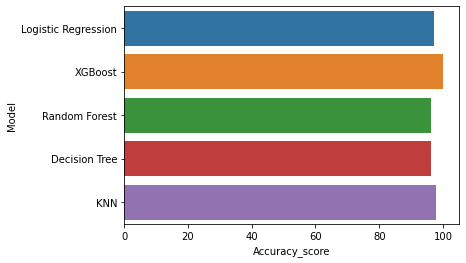

In [66]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy_score' :[lr_test_data_accuracy, xgb_test_data_accuracy, rf_test_data_accuracy, DT_test_data_accuracy, KNN_test_data_accuracy]
})
models

sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

### In the above comparision , we can say that the Accuracy score of XGBoost model is very good as compared to other models